Карта 1: Случайный шум


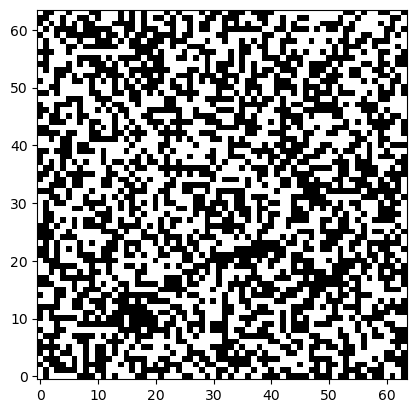

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_map():
    return 1-np.array([[np.random.choice([0, 1]) for _ in range(64)] for _ in range(64)])

# Вывод карты:
print("Карта 1: Случайный шум")
plt.imshow(generate_random_map(), cmap='gray', origin='lower')
plt.show()



Карта 2: Клеточный автомат


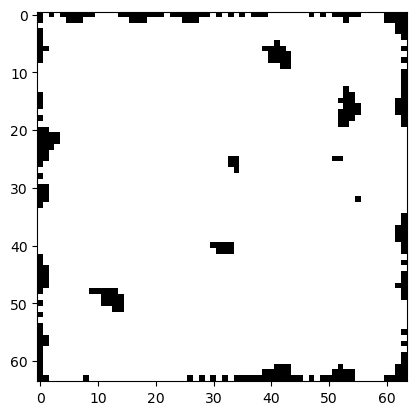

In [93]:
import random

def generate_cellular_automata_map():
    # Начальная генерация
    grid = [[1 if np.random.uniform() < 0.45 else 0 for _ in range(64)] for _ in range(64)]
    
    def count_neighbors(i, j, grid):
        count = 0
        for di in (-1, 0, 1):
            for dj in (-1, 0, 1):
                if di == 0 and dj == 0:
                    continue
                ni, nj = i + di, j + dj
                if 0 <= ni < 64 and 0 <= nj < 64:
                    count += grid[ni][nj]
                else:
                    # За границей считаем ячейку заполненной
                    count += 1
        return count
    
    # Применяем правило несколько раз (например, 4 итерации)
    for _ in range(4):
        new_grid = [[0]*64 for _ in range(64)]
        for i in range(64):
            for j in range(64):
                if count_neighbors(i, j, grid) >= 5:
                    new_grid[i][j] = 1
                else:
                    new_grid[i][j] = 0
        grid = new_grid
    return 1-np.array(grid)

# Вывод карты:
print("\nКарта 2: Клеточный автомат")
plt.imshow(generate_cellular_automata_map(), cmap='gray')
plt.show()


Карта 3: Круговая структура


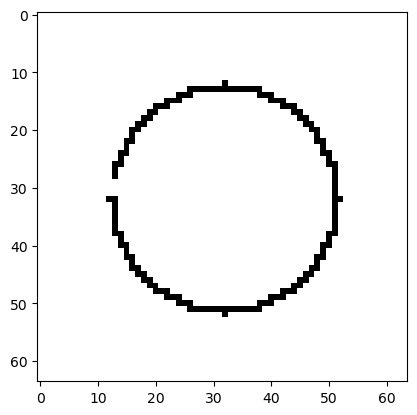

In [90]:
def generate_circular_map():
    center = 32
    radius_sq = 400  # 20^2
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if (i - center)**2 + (j - center)**2 <= radius_sq:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    bound_coords = []
    for i in range(64):
        for j in range(64):
            if (i - center)**2 + (j - center)**2 <= radius_sq - 48:
                grid[i][j] = 0
            elif grid[i][j] == 1:
                bound_coords.append((i, j))
    intro = bound_coords[np.random.choice(len(bound_coords))]
    for i in range(-1, 2):
        for j in range(-1, 2):
            grid[intro[0] + i][intro[1] + j] = 0
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 3: Круговая структура")
plt.imshow(generate_circular_map(), cmap='gray')
plt.show()

Карта 4: Спираль


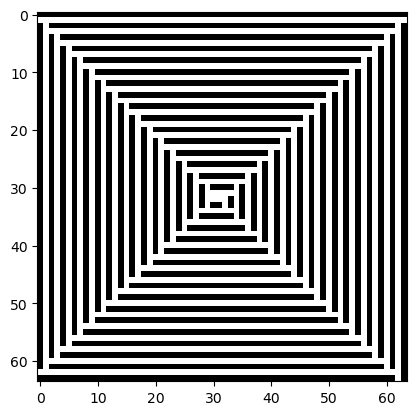

In [121]:
def generate_spiral_map():
    N = 64
    grid = [[0 for _ in range(N)] for _ in range(N)]
    top, bottom = 0, N - 1
    left, right = 0, N - 1
    direction = 0
    step = 2
    while top <= bottom and left <= right:
        if direction == 0:
            for j in range(left, right + 1):
                grid[top][j] = 1
            top += step
        elif direction == 1:
            for i in range(top, bottom + 1):
                grid[i][right] = 1
            right -= step
        elif direction == 2:
            for j in range(right, left - 1, -1):
                grid[bottom][j] = 1
            bottom -= step
        elif direction == 3:
            for i in range(bottom, top - 1, -1):
                grid[i][left] = 1
            left += step
        direction = (direction + 1) % 4
    return 1 - np.array(grid)

# Вывод карты:
print("Карта 4: Спираль")
plt.imshow(generate_spiral_map(), cmap='gray')
plt.show()



Карта 5: Симметричная карта


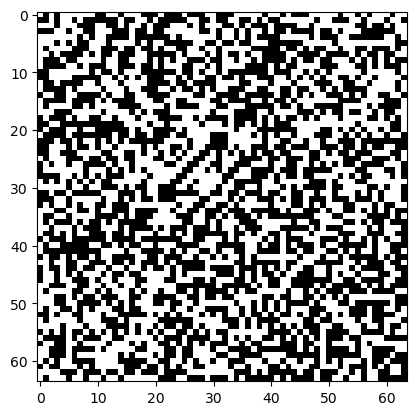

In [72]:
import random

def generate_symmetric_map():
    random.seed(0)
    grid = [[0 for _ in range(64)] for _ in range(64)]
    for i in range(64):
        for j in range(i, 64):
            val = np.random.choice([0, 1])
            grid[i][j] = val
            grid[j][i] = val
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 5: Симметричная карта")
plt.imshow(generate_symmetric_map(), cmap='gray')
plt.show()



Карта 6: Шахматная доска


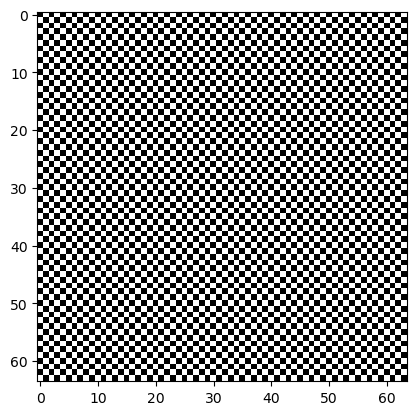

In [75]:
def generate_checkerboard_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if (i + j) % 2 == 0:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 6: Шахматная доска")
plt.imshow(generate_checkerboard_map(), cmap='gray')
plt.show()


Карта 7: Вороной


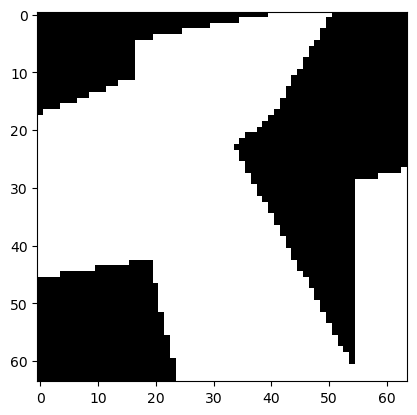

In [134]:
import random

def generate_voronoi_map():
    random.seed(0)
    num_seeds = 10
    seeds = [(np.random.randint(0, 63), np.random.randint(0, 63)) for _ in range(num_seeds)]
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            min_dist = float('inf')
            seed_index = 0
            for k, (si, sj) in enumerate(seeds):
                dist = (i - si)**2 + (j - sj)**2
                if dist < min_dist:
                    min_dist = dist
                    seed_index = k
            # Если индекс семени четный?, присваиваем 1, иначе 0
            row.append(1 if seed_index % 2 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 7: Вороной")
plt.imshow(generate_voronoi_map(), cmap='gray')
plt.show()



Карта 8: Лабиринт (случайный блуждающий путь)


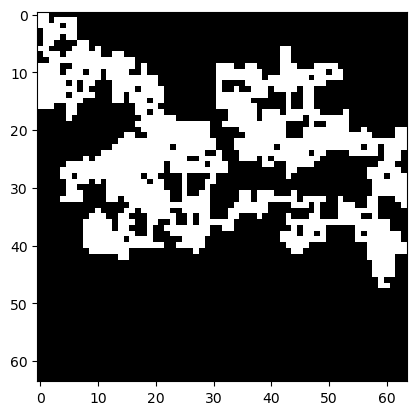

In [108]:
import random

def generate_random_walk_maze():
    N = 64
    grid = [[1]*N for _ in range(N)]
    x, y = 0, 0
    grid[x][y] = 0
    for _ in range(3000):
        dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0)])
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            x, y = nx, ny
            grid[x][y] = 0
    return 1 - np.array(grid)

print("\nКарта 8: Лабиринт (случайный блуждающий путь)")
plt.imshow(generate_random_walk_maze(), cmap='gray')
plt.show()


Карта 9: Sierpinski-подобная


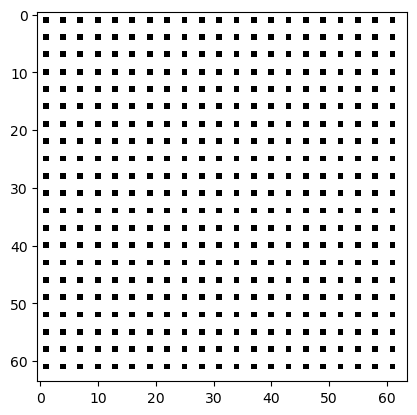

In [115]:
def generate_sierpinski_like_map():
    N = 64
    grid = []
    for i in range(N):
        row = []
        for j in range(N):
            # Если координаты удовлетворяют условию, ставим 0, иначе 1
            if i % 3 == 1 and j % 3 == 1:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 9: Sierpinski-подобная")
plt.imshow(generate_sierpinski_like_map(), cmap='gray')
plt.show()


Карта 10: Волновые интерференции


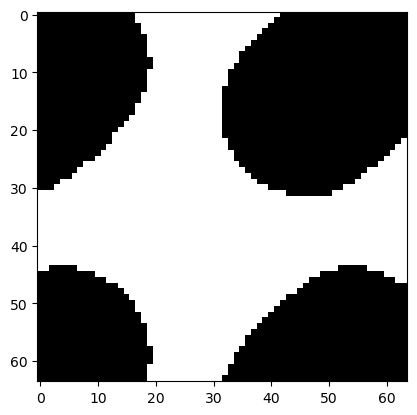

In [181]:
import math

def generate_wave_interference_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            # Комбинируем несколько волн с различными параметрами
            value = math.sin(i / 8.0) + math.cos(j / 8.0) + 0.5 * math.sin((i + j) / 8.0)
            row.append(1 if value > 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 10: Волновые интерференции")
plt.imshow(generate_wave_interference_map(), cmap='gray')
plt.show()


Карта 11: Квадратные узоры


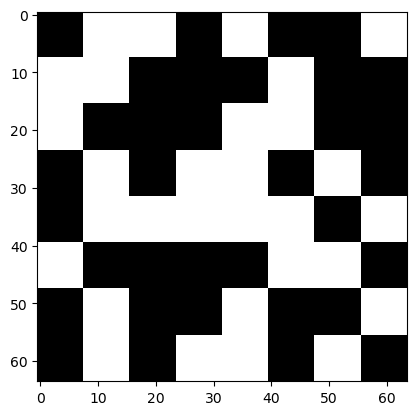

In [182]:
import random

def generate_block_pattern_map():
    grid = [[0] * 64 for _ in range(64)]
    block_size = 8
    for bi in range(0, 64, block_size):
        for bj in range(0, 64, block_size):
            block_val = random.choice([0, 1])
            for i in range(bi, bi + block_size):
                for j in range(bj, bj + block_size):
                    grid[i][j] = block_val
    return 1 - np.array(grid)

print("\nКарта 11: Квадратные узоры")
plt.imshow(generate_block_pattern_map(), cmap='gray')
plt.show()


Карта 12: Рандомизированная симметрия


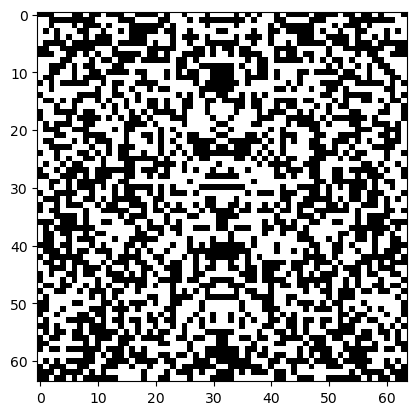

In [251]:
import random

def generate_random_symmetry_map():
    grid = [[0] * 64 for _ in range(64)]
    # Генерация левой половины (0-31 столбцы)
    for i in range(64):
        for j in range(32):
            grid[i][j] = random.choice([0, 1])
    # Зеркальное отражение с небольшим шумом
    for i in range(64):
        for j in range(32):
            if random.random() < 0.1:  # 10% шанс инвертировать значение
                grid[i][63 - j] = 1 if grid[i][j] == 0 else 0
            else:
                grid[i][63 - j] = grid[i][j]
    return 1 - np.array(grid)

print("\nКарта 12: Рандомизированная симметрия")
plt.imshow(generate_random_symmetry_map(), cmap='gray')
plt.show()


Карта 13: Альтернативные концентрические кольца


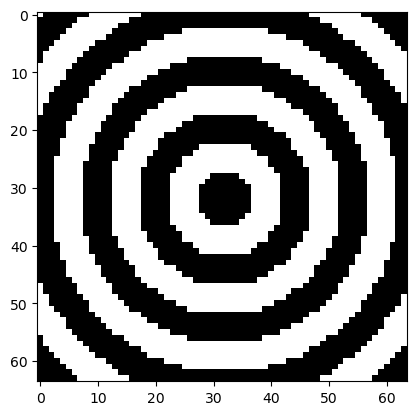

In [185]:
def generate_alternating_concentric_rings():
    center = 32
    ring_width = 5
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            distance = ((i - center)**2 + (j - center)**2) ** 0.5
            ring_index = int(distance // ring_width)
            row.append(1 if ring_index % 2 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 13: Альтернативные концентрические кольца")
plt.imshow(generate_alternating_concentric_rings(), cmap='gray')
plt.show()


Карта 14: Диагональные полосы


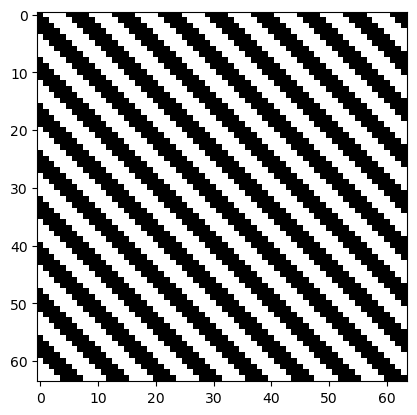

In [186]:
def generate_diagonal_stripes():
    stripe_width = 8
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if ((i - j) % stripe_width) < stripe_width / 2:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 14: Диагональные полосы")
plt.imshow(generate_diagonal_stripes(), cmap='gray')
plt.show()


Карта 15: Рекурсивное деление


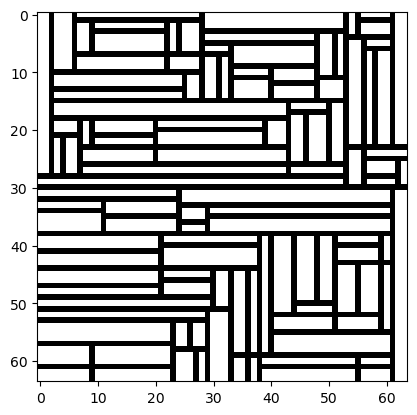

In [187]:
import random

def generate_recursive_division_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def divide(x, y, w, h, orientation):
        if w < 4 or h < 4:
            return
        if orientation == 'H':
            split = random.randint(y+1, y+h-2)
            for j in range(x, x+w):
                grid[split][j] = 1
            divide(x, y, w, split-y, 'V')
            divide(x, split+1, w, y+h-split-1, 'V')
        else:  # вертикальное деление
            split = random.randint(x+1, x+w-2)
            for i in range(y, y+h):
                grid[i][split] = 1
            divide(x, y, split-x, h, 'H')
            divide(split+1, y, x+w-split-1, h, 'H')

    divide(0, 0, 64, 64, 'H')
    return 1 - np.array(grid)

print("\nКарта 15: Рекурсивное деление")
plt.imshow(generate_recursive_division_map(), cmap='gray')
plt.show()

Карта 16: Горный профиль


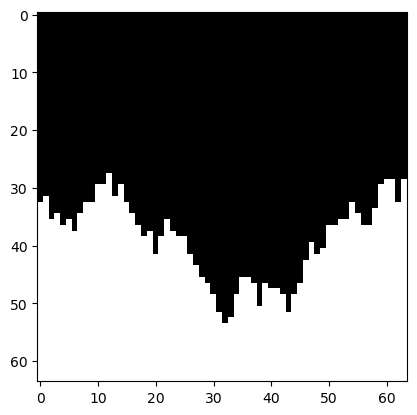

In [188]:
import random

def generate_mountain_profile():
    grid = []
    elevation = 32  # начальное значение высоты
    n = 4
    heights = []
    # Генерация высоты для каждой колонки
    for j in range(64):
        elevation += random.choice(np.arange(-n, n + 1))
        elevation = max(0, min(63, elevation))
        heights.append(elevation)
    # Формирование карты: строки, где для каждой колонки (j) клетки с i < heights[j] получают 1
    for i in range(64):
        row = []
        for j in range(64):
            row.append(1 if i < heights[j] else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 16: Горный профиль")
plt.imshow(generate_mountain_profile(), cmap='gray')
plt.show()


Карта 17: Радиационное распространение


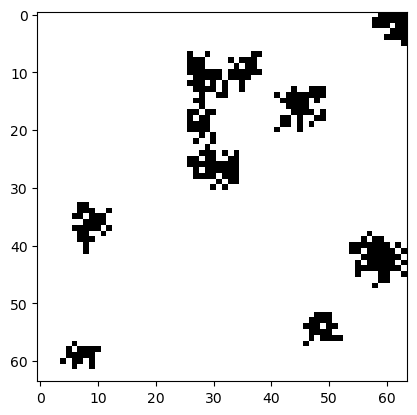

In [189]:
import random

def generate_radiation_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    # Инициализируем случайными семенами (единицами)
    num_seeds = 10
    for _ in range(num_seeds):
        i = random.randint(0, 63)
        j = random.randint(0, 63)
        grid[i][j] = 1
    # Несколько итераций распространения
    for _ in range(5):
        new_grid = [row[:] for row in grid]
        for i in range(64):
            for j in range(64):
                if grid[i][j] == 0:
                    # Проверяем соседей
                    neighbors = []
                    for di in (-1, 0, 1):
                        for dj in (-1, 0, 1):
                            if di == 0 and dj == 0:
                                continue
                            ni, nj = i + di, j + dj
                            if 0 <= ni < 64 and 0 <= nj < 64:
                                neighbors.append(grid[ni][nj])
                    if any(neighbors) and random.random() < 0.3:
                        new_grid[i][j] = 1
        grid = new_grid
    return 1 - np.array(grid)

print("\nКарта 17: Радиационное распространение")
plt.imshow(generate_radiation_map(), cmap='gray')
plt.show()



Карта 18: Перлин-подобная


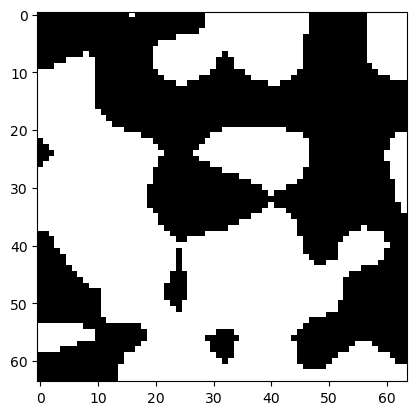

In [190]:
import random

def generate_perlin_like_map():
    coarse_size = 8
    # Создаём грубую сетку случайных значений размером (coarse_size+1) x (coarse_size+1)
    coarse = [[random.random() for _ in range(coarse_size+1)] for _ in range(coarse_size+1)]
    
    def lerp(a, b, t):
        return a + t * (b - a)
    
    def bilerp(x, y, q11, q21, q12, q22):
        r1 = lerp(q11, q21, x)
        r2 = lerp(q12, q22, x)
        return lerp(r1, r2, y)
    
    grid = []
    for i in range(64):
        row = []
        i_coarse = i / 8.0
        i0 = int(i_coarse)
        i1 = min(i0 + 1, coarse_size)
        y = i_coarse - i0
        for j in range(64):
            j_coarse = j / 8.0
            j0 = int(j_coarse)
            j1 = min(j0 + 1, coarse_size)
            x = j_coarse - j0
            # Билинейная интерполяция значений в точке
            value = bilerp(x, y, coarse[i0][j0], coarse[i0][j1], coarse[i1][j0], coarse[i1][j1])
            row.append(1 if value > 0.5 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 18: Перлин-подобная")
plt.imshow(generate_perlin_like_map(), cmap='gray')
plt.show()


Карта 19: Падающие капли


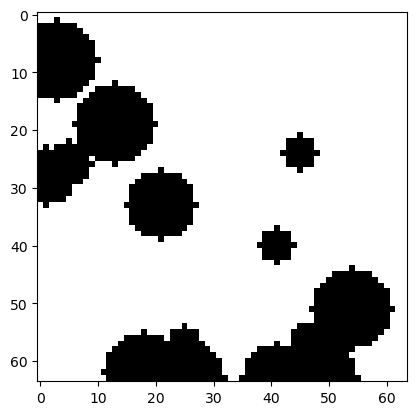

In [221]:
import random, math

def generate_droplets_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    num_droplets = 15
    for _ in range(num_droplets):
        cx = random.randint(0, 63)
        cy = random.randint(0, 63)
        radius = random.randint(3, 8)
        for i in range(64):
            for j in range(64):
                if (i - cx)**2 + (j - cy)**2 <= radius**2:
                    grid[i][j] = 1
    return 1 - np.array(grid)

print("Карта 19: Падающие капли")
plt.imshow(generate_droplets_map(), cmap='gray')
plt.show()



Карта 20: Побитовое XOR


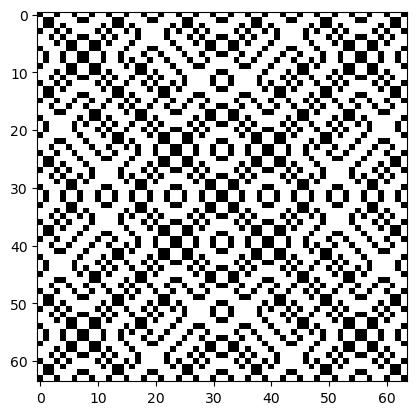

In [222]:
def generate_xor_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            row.append(1 if (i ^ j) % 3 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 20: Побитовое XOR")
plt.imshow(generate_xor_map(), cmap='gray')
plt.show()



Карта 21: Лабиринт с возвратами (DFS)


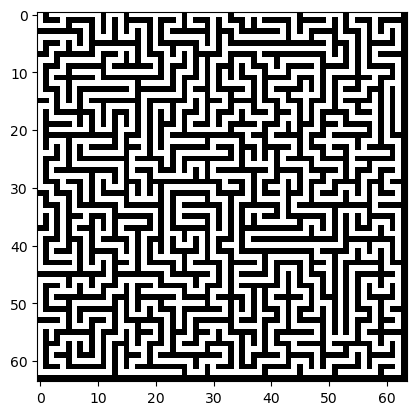

In [223]:
import random

def generate_maze_dfs():
    grid = [[1 for _ in range(64)] for _ in range(64)]
    start = (0, 0)
    stack = [start]
    grid[0][0] = 0
    directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]
    
    def neighbors(cell):
        x, y = cell
        result = []
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 64 and 0 <= ny < 64:
                result.append((nx, ny))
        return result
    
    while stack:
        current = stack[-1]
        unvisited = [n for n in neighbors(current) if grid[n[0]][n[1]] == 1]
        if unvisited:
            next_cell = random.choice(unvisited)
            # Прорезаем проход между current и next_cell
            mid = ((current[0] + next_cell[0]) // 2, (current[1] + next_cell[1]) // 2)
            grid[next_cell[0]][next_cell[1]] = 0
            grid[mid[0]][mid[1]] = 0
            stack.append(next_cell)
        else:
            stack.pop()
    return 1 - np.array(grid)

print("\nКарта 21: Лабиринт с возвратами (DFS)")
plt.imshow(generate_maze_dfs(), cmap='gray')
plt.show()


Карта 22: Фрактальное дерево


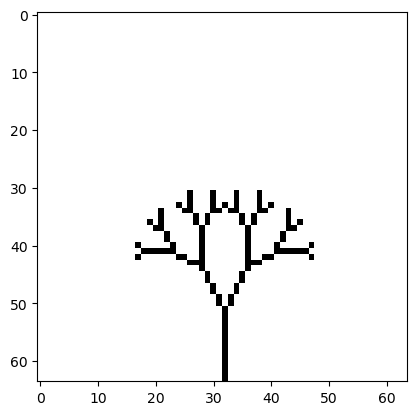

In [224]:
import math

def generate_fractal_tree_map():
    # Создаём пустую карту 64×64 (значения 0)
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def draw_line(x0, y0, x1, y1):
        # Алгоритм Брезенхема для рисования линии
        dx = abs(x1 - x0)
        dy = abs(y1 - y0)
        sx = 1 if x0 < x1 else -1
        sy = 1 if y0 < y1 else -1
        err = dx - dy
        while True:
            if 0 <= x0 < 64 and 0 <= y0 < 64:
                grid[y0][x0] = 1  # Обратите внимание: y — индекс строки, x — столбца
            if x0 == x1 and y0 == y1:
                break
            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                x0 += sx
            if e2 < dx:
                err += dx
                y0 += sy

    def branch(x, y, angle, length, depth):
        if depth == 0 or length < 1:
            return
        # Вычисляем конечную точку ветви
        x1 = x + int(round(math.cos(angle) * length))
        y1 = y + int(round(math.sin(angle) * length))
        draw_line(x, y, x1, y1)
        # Рекурсивно запускаем две ветви под углами ±30°
        branch(x1, y1, angle - math.pi/6, length * 0.7, depth - 1)
        branch(x1, y1, angle + math.pi/6, length * 0.7, depth - 1)
    
    # Запускаем дерево из нижней центральной точки, направляя вверх (-π/2)
    branch(32, 63, -math.pi/2, 12, 5)
    return 1 - np.array(grid)

print("Карта 22: Фрактальное дерево")
plt.imshow(generate_fractal_tree_map(), cmap='gray')
plt.show()



Карта 23: Случайные линии


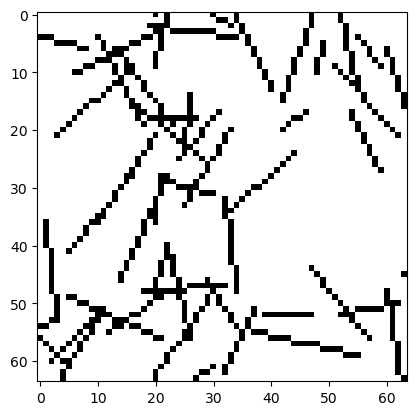

In [225]:
import random, math

def generate_random_lines_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def draw_line(x0, y0, x1, y1):
        dx = abs(x1 - x0)
        dy = abs(y1 - y0)
        sx = 1 if x0 < x1 else -1
        sy = 1 if y0 < y1 else -1
        err = dx - dy
        while True:
            if 0 <= x0 < 64 and 0 <= y0 < 64:
                grid[y0][x0] = 1
            if x0 == x1 and y0 == y1:
                break
            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                x0 += sx
            if e2 < dx:
                err += dx
                y0 += sy
    
    # Рисуем, например, 50 случайных линий
    for _ in range(50):
        x0 = random.randint(0, 63)
        y0 = random.randint(0, 63)
        angle = random.uniform(0, 2 * math.pi)
        length = random.randint(5, 20)
        x1 = x0 + int(round(math.cos(angle) * length))
        y1 = y0 + int(round(math.sin(angle) * length))
        draw_line(x0, y0, x1, y1)
    
    return 1 - np.array(grid)

print("\nКарта 23: Случайные линии")
plt.imshow(generate_random_lines_map(), cmap='gray')
plt.show()



Карта 24: Логистический хаос


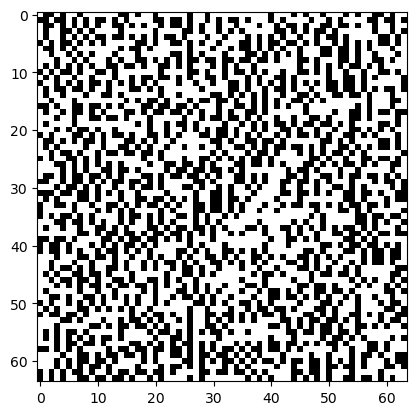

In [226]:
import random

def generate_logistic_chaos_map():
    r = 3.9
    grid = []
    for _ in range(64):
        row = []
        x = random.random()  # начальное значение для строки
        for _ in range(64):
            x = r * x * (1 - x)
            row.append(1 if x > 0.5 else 0)
        grid.append(row)
    return grid

print("\nКарта 24: Логистический хаос")
plt.imshow(generate_logistic_chaos_map(), cmap='gray')
plt.show()


Карта 25: Вихревые узоры


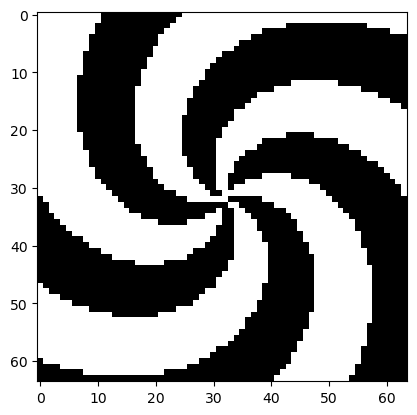

In [229]:
import math

def generate_swirl_map():
    center = 32
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            dx = i - center
            dy = j - center
            angle = math.atan2(dy, dx)
            distance = math.sqrt(dx**2 + dy**2)
            # Смешиваем угол и расстояние для создания вихревого эффекта
            value = math.sin(5 * angle + distance / 4.0)
            row.append(1 if value > 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 25: Вихревые узоры")
plt.imshow(generate_swirl_map(), cmap='gray')
plt.show()



Карта 26: Нерегулярная решетка


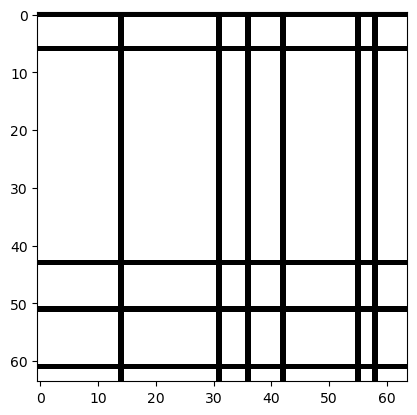

In [234]:
import random

def generate_irregular_grid():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    # С вероятностью 10% выбираем строки для горизонтальных линий
    horizontal_lines = [i for i in range(64) if random.random() < 0.1]
    # С вероятностью 10% выбираем столбцы для вертикальных линий
    vertical_lines = [j for j in range(64) if random.random() < 0.1]
    
    for i in horizontal_lines:
        for j in range(64):
            grid[i][j] = 1
    for j in vertical_lines:
        for i in range(64):
            grid[i][j] = 1
    return 1 - np.array(grid)

print("\nКарта 26: Нерегулярная решетка")
plt.imshow(generate_irregular_grid(), cmap='gray')
plt.show()


Карта 27: Клеточный автомат — правило 30


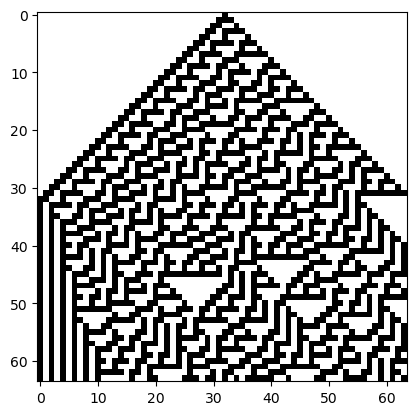

In [237]:
def generate_rule30():
    width = 64
    grid = []
    # Начальная строка: все 0, кроме центральной ячейки = 1
    row = [0] * width
    row[width // 2] = 1
    grid.append(row)
    for _ in range(63):
        new_row = [0] * width
        for j in range(width):
            # Получаем значения левого, центрального и правого соседей (вне границ считаем 0)
            left = row[j-1] if j-1 >= 0 else 0
            center_val = row[j]
            right = row[j+1] if j+1 < width else 0
            # Правило 30:
            # 111 -> 0, 110 -> 0, 101 -> 0, 100 -> 1, 011 -> 1, 010 -> 1, 001 -> 1, 000 -> 0
            pattern = (left << 2) | (center_val << 1) | right
            if pattern in [0b100, 0b011, 0b010, 0b001]:
                new_row[j] = 1
            else:
                new_row[j] = 0
        grid.append(new_row)
        row = new_row
    return 1 - np.array(grid)

print("\nКарта 27: Клеточный автомат — правило 30")
plt.imshow(generate_rule30(), cmap='gray')
plt.show()


Карта 28: Псевдоспираль


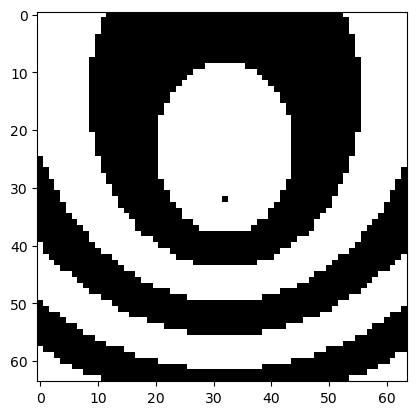

In [241]:
import math

def generate_pseudo_spiral():
    center = 32
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            dx = i - center
            dy = j - center
            distance = math.sqrt(dx**2 + dy**2)
            value = math.sin(distance / 3.0 + dx * 0.2)  # Спиральный эффект
            row.append(0 if value > 0 else 1)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 28: Псевдоспираль")
plt.imshow(generate_pseudo_spiral(), cmap='gray')
plt.show()



Карта 29: Дождевые разводы


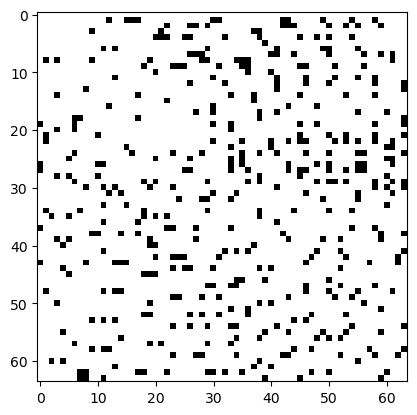

In [247]:
import random, math

def generate_rain_ripples():
    grid = [[1 for _ in range(64)] for _ in range(64)]
    
    num_ripples = 10  # Количество точек-источников
    ripple_centers = [(random.randint(0, 63), random.randint(0, 63)) for _ in range(num_ripples)]
    
    for i in range(64):
        for j in range(64):
            for cx, cy in ripple_centers:
                distance = math.sqrt((i - cx)**2 + (j - cy)**2)
                if int(distance) % 5 == 0:  # Разводы появляются через каждые 5 клеток
                    grid[i][j] = 0
    
    return 1 - np.array(grid)

print("\nКарта 29: Дождевые разводы")
plt.imshow(generate_rain_ripples(), cmap='gray')
plt.show()



Карта 30: Случайная текстура (Perlin Noise-подобная)


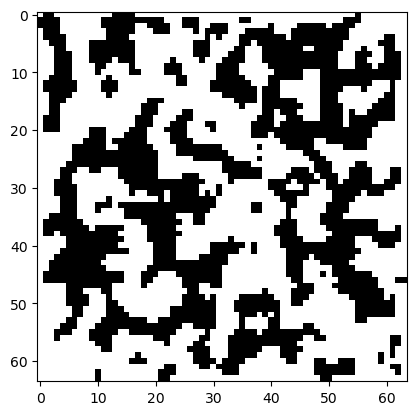

In [250]:
import random

def generate_random_texture():
    grid = [[random.randint(0, 1) for _ in range(64)] for _ in range(64)]

    # Применяем размытие: заменяем каждую ячейку на среднее её соседей
    for _ in range(2):  # Два прохода сглаживания
        new_grid = [[0 for _ in range(64)] for _ in range(64)]
        for i in range(64):
            for j in range(64):
                neighbors = [
                    grid[x][y] for x in range(max(0, i - 1), min(64, i + 2))
                               for y in range(max(0, j - 1), min(64, j + 2))
                ]
                new_grid[i][j] = 1 if sum(neighbors) > 4 else 0  # Усредняем
        grid = new_grid
    
    return 1 - np.array(grid)

print("\nКарта 30: Случайная текстура (Perlin Noise-подобная)")
plt.imshow(generate_random_texture(), cmap='gray')
plt.show()
